<h1>Fluorescence Anisotropy Analysis</h1>

<h2>Competition Experiments<h2>

<h2>Using the package without installation</h2>

To use the package without istallation, download the `Fluorescence-Anisotropy-Analysis` repository from GitHub and extract the folder from ZIP file to desired location.
To start data analysis, create a Jupyter Notebook file in the folder containing the *flu_ani_analysis* source code (*Fluorescence-Anisotropy-Analysis-main* folder in this case) and use the following line to import the flu_ani_analysis package:

In [1]:
from flu_ani_analysis.flu_ani_analysis_module import FA

<h2>Importing raw data</h2>

You can import the raw data in csv format that was exported from Perkin Elmer Envision instruments using the `read_in_envision` function. Reading in the data requires a plate map that contains information about every well.

Data in both plate and list format can be read in using the same function and the number of wells on the plate has to be specified.

In [3]:
comp_data = 'comp_data.csv'                # Note that this will only work if the files are in the same folder
comp_platemap = 'comp_platemap.csv'   # as this Jupyter notebook, alternatively you can provide a full file path

my_data = FA.read_in_envision(data_csv=comp_data, platemap_csv=comp_platemap, data_type='plate', size=384)

Data has been uploaded!

Number of repeats: 1 
Value of g-factor: 1.0 
Overall number of empty cells is 128 in 2 data frames.
Proteins: ['Protein']
Tracers: ['Tracer']
Competitors: ['Competitor 1' 'Competitor 2' 'Competitor 3' 'Competitor 4']


<h2>Visualising the data for each well</h2>

The imported data is stored as pandas data frames in a nested dictionary. 
You can display the contents of each well (both the imported data and data from platemap) using the `visualise` function. 

The `labelby` argument specifes what is displayed on the well and `colorby` argument controls its color. All the platemap column names such as *Type*, *Contents*, *Protein Name*, *Protein Concentration*, *Tracer Name*, *Tracer Concentration* can be passed as `labelby` and `colorby` arguments. To display the imported data such as *p* and *s* channel intensity, pass a tuple of repeat number and the specified variable, e.g. `labelby=('repeat_1, 'p')`.

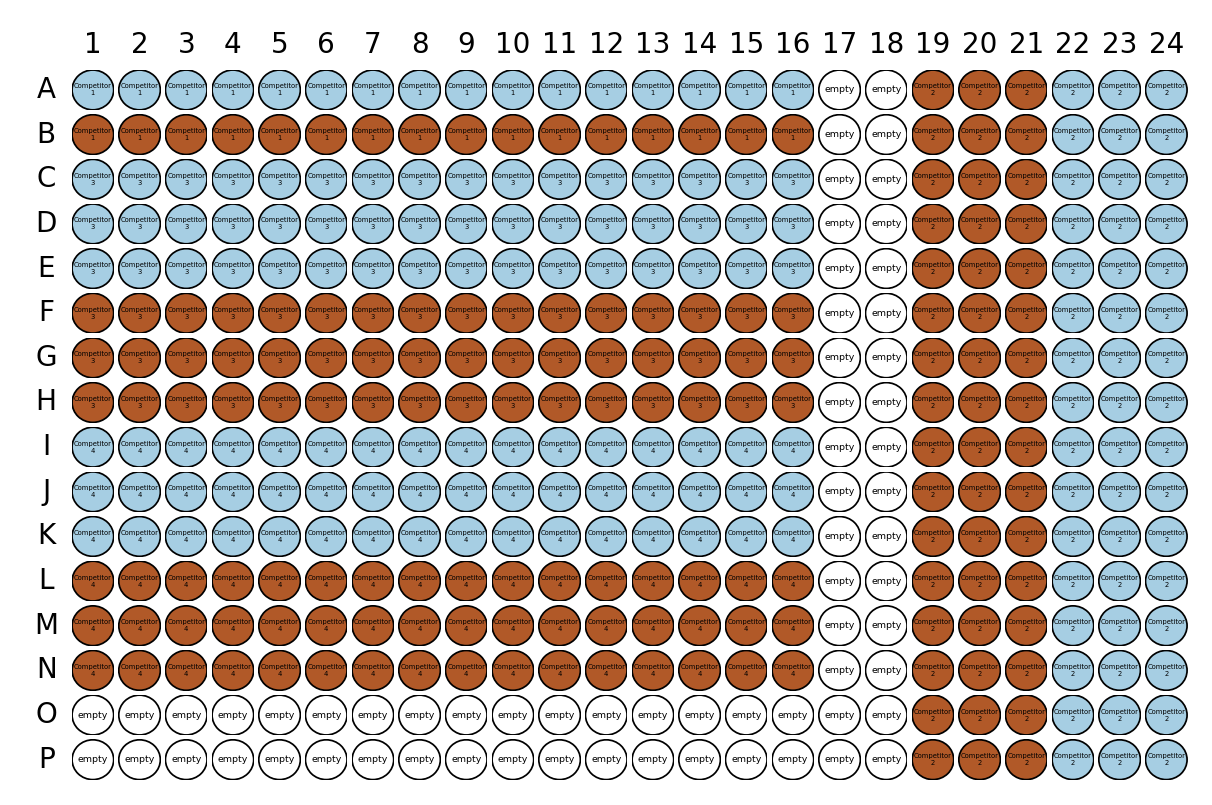

In [4]:
my_data.visualise(labelby='Competitor Name', colorby='Type')

<h2>Background correction</h2>

To calculate the background corrected values for *p* and *s* channel intensity in all repeats use the `background_correct` function.

The backgorund correction is done by subtracting the mean value of blank *p* (or *s*) channel intensity for a given protein (or tracer) concentration from each non-blank value of the *p* (or *s*) channel intensity for that concentration. 

To display the background corrected values on the platemap use the *p_corrected* or *s_corrected* as a variable along the repeat number in the `visualise` function (e.g. `labelby=('repeat_2', 'p_corrected')`).

Background correction can be performed multiple times on a sigle data set, the existing corrected data will be overwritten.

In [5]:
my_data.background_correct()

Background correction has been successfully performed!


<h2>Anisotropy and intensity calculation</h2>

The `calc_r_i` function calculates the anisotropy and intensity for each well in all repeats using the following formulas:

<p>$I = s + 2gp$</p>

<p>$r = \frac{s - gp}{I}$</p>

<p>Where <em>I</em> is fluorescence intensity, <em>r</em> is anisotropy, <em>g</em> is g factor, <em>p</em> is p channel intensity, <em>s</em> is s channel intensity.</p>
         
If the `correct=False` argument is passed the anisotropy an fluorescence inensity will only be calculated using the raw *p* and *s* channel values and not the background corrected values. The variables for the `visualise` funtion are: *i_raw*, *r_raw*, *i_corrected* and *r_corrected*.

The functinon also calculates the percentage intesity of the non blank well as comapred to the blank corrected wells. By default the plot of the percentage intenstiy against the well ids for all repeats is displayed along with a summary of wells above the threshold (defaults to 80%), however it can be turned off by passing the `plot_i=False` argument.

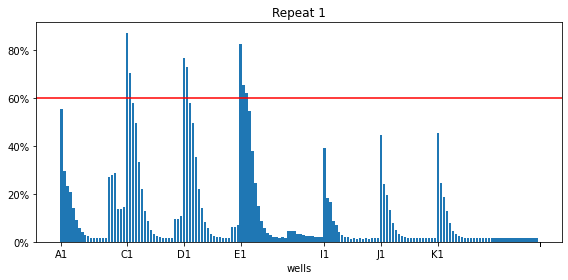

In the following wells the percentage intensity value was above the 60% threshold:
	repeat_1: ['C1', 'C2', 'D1', 'D2', 'E1', 'E2', 'E3']



In [6]:
my_data.calc_r_i(thr=60)

<h2>Mean anisotropy and intensity calculation</h2>

To calculate the mean anisotropy and intensity along with their standard deviation and standrad error for all replicates for a given protein (or tracer) concentration use `calc_mean_r_i` function. This data is required for subsequent logistic curve fitting.

In [8]:
my_data.calc_mean_r_i()

<h2>Logistic curve fitting</h2>

The `logistic_fit` functinon fits a logistic curve to the plot of anisotropy and intensity against protein (or tracer) concentration using the following formula:

<p>$r = \frac{r_{min} - r_{max}}{1 + \bigl( \frac{p} {EC_{50}} \bigl) ^{hill}} + r_{max}$</p>

<p>Where <em>p</em> is protein concentration, <em>r<sub>max</sub></em> is the upper limit of anisotropy, <em>r<sub>min</sub></em> is the lower limit of anisotropy, <em>EC<sub>50</sub></em> is midpoint of transition, <em>hill</em> is the slope.</p>

By default, the curve fitting is done for all protein-tracer pairs in all repeats and for both anisotropy and intensity data. However, you can use the `prot`, `trac`, `rep` and `var` arguments to specify lists of protein and tracer names, repeats and a  string representing the variable (`'r'` or `'i'`) for which the fitting will be performed. For example, to do the fitting only for the *Protein 1*  and *Tracer* in repeat 1 and for intensity data, pass `prot=['Protein 1']`, `trac=['Tracer']`, `rep=[1]`, `var='i'`.

The `curve_fit` function from SciPy module is used to do the curve fitting and so all arguments accepted by this function can be passed as keyword arguments to the `logistic_fit` function. The exception is `sigma` argument which is passed as either `sigma='std'` or `sigma='sem'` to perform the curve fitting taking into account the specified errors.

In [9]:
my_data.logisitc_fit_com()

If the curve fitting fails for any of the protein-tracer pairs, a detailed warning is provided. In such cases, try repeating the curve fitting for only the failed data passing additional keyword arguments such as `sigma`, `p0`, `bounds`, etc.

C:\Program Files (x86)\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


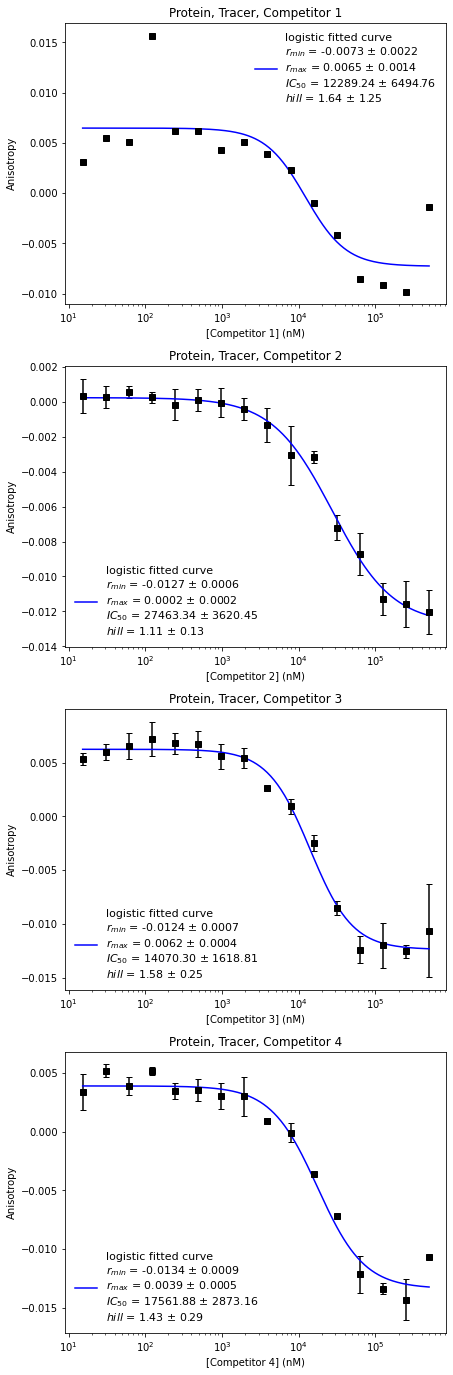

In [10]:
my_data.plot_ani_com()

By default, results for all protein-tacer pairs in all repeats are plotted. You can use the `prot`, `trac` and `rep`  arguments to specify lists of protein and tracer names and repeats for which the data will be plotted. For example, to plot data only for the *Protein 2*  and *Tracer* in repeat 1, pass `prot=['Protein 2']`, `trac=['Tracer']`, `rep=[1]`.

TypeError: 'AxesSubplot' object is not subscriptable

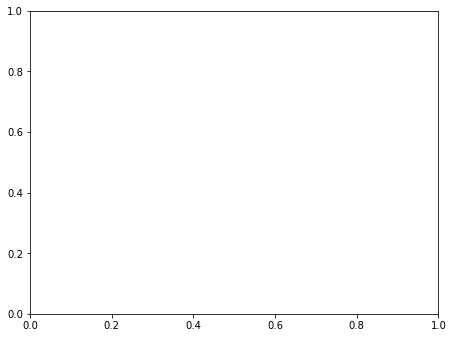

In [11]:
my_data.plot_ani_com(com=['Competitor 2'])

<h2>Importing the binding constant (Kd)<h2>

In [12]:
my_data.import_params("final_fit_params.csv")

C:\Users\Bartek\OneDrive\Documents\Programming\Python\MChem-project\test_module\flu_ani_analysis\flu_ani_analysis_module.py:1616: UserWarning: The final_fit data frame does not contain following columns: '['LT', 'LT error']'
  warnings.warn(f"The final_fit data frame does not contain following columns: '{col_diff}'")


In [13]:
my_data.final_fit

rmin  rmin error      rmax  rmax error  \
Protein Tracer Competitor 1 -0.011513    0.000356  0.124883    0.001465   
               Competitor 2 -0.011513    0.000356  0.124883    0.001465   
               Competitor 3 -0.011513    0.000356  0.124883    0.001465   
               Competitor 4 -0.011513    0.000356  0.124883    0.001465   

                             lambda           Kd    Kd error  
Protein Tracer Competitor 1     1.0  8782.305653  238.431649  
               Competitor 2     1.0  8782.305653  238.431649  
               Competitor 3     1.0  8782.305653  238.431649  
               Competitor 4     1.0  8782.305653  238.431649

<h2>Amount of tracer bound calculation</h2>

The `calc_amount_bound` function calculates the amount of fluorescent tracer bound to the protein using the following formula:

$L_{B} = \Bigl( \frac {\lambda(r_{max}-r)} {r-r_{min}} +1 \Bigl) ^{-1} L_{T}$

Where <em>L<sub>B</sub></em> is the concentration of fluorescent tracer bound to the target protein, <em>L<sub>T</sub></em> is the total tracer concentration, <em>&#955;</em> is the difference in quantum yields between bound and free states, <em>r</em> is the anisotropy, <em>r<sub>max</sub></em> is the upper limit of anisotropy, <em>r<sub>min</sub></em> is the lower limit of anisotropy. 

The mean value of anisotropy for all replicates (if present) for a given protein (or tacer) concentration is used in this calculation. The standard deviation and standard error are also calculated. 

In [14]:
my_data.calc_amount_bound()

<h2>Sigle site curve fitting</h2>

The `single_site_fit` function fits a curve to the plot of concentration of fluorescent tracer bound to the target protein  against the total protein concentration (or total tracer concentration in case of the tracer titration experiment). The following equation is used:

$L_{B} = \frac{ L_{T}+P_{T}+K_{d} - \sqrt{ (L_{T}+P_{T}+K_{d})^2 - 4L_{T}+P_{T} }}{2}$

Where <em>L<sub>T</sub></em> is the total tracer concentration, <em>P<sub>T</sub></em> is the total protein concentration, <em>K<sub>d</sub></em> is the dissociation constant.

By default, the curve fitting is done for all protein-tracer pairs in all repeats. However, you can use the `prot`, `trac` and  `rep`  arguments to specify lists of protein and tracer names and repeats for which the fitting will be performed. For example, to do the fitting only for the *Protein 1*  and *Tracer* in repeat 1, pass `prot=['Protein 1']`, `trac=['Tracer']`, `rep=[1]`.

The `curve_fit` function from SciPy module is used to do the curve fitting and so all arguments accepted by this function can be passed as keyword arguments to the `single_site_fit` function. The exception is `sigma` argument which is passed as either `sigma='std'` or `sigma='sem'` to perform the curve fitting taking into account the specified errors.

In [24]:
my_data.single_site_com()

If the curve fitting fails for any of the protein-tracer pairs, a detailed warning is provided. In such cases, try fitting again passing additional arguments such as `sigma`, `p0`, `bounds`, etc.


The resulting fitting parameters <em>L<sub>T</sub></em> (or <em>P<sub>T</sub></em>) and <em>K<sub>d</sub></em> and their associated errors are added to the `final_fit` data frame. 

You can display the plots of concentration of fluorescent tracer bound to target protein against the protein (or tracer) concentration with a fitted curve using the `plot_kd` function (the `err` argument specifes data used to display error bars, can be either `'std'` or `'sem'`). By default, the function plots data for all repeats and protein-tracer pairs on separate figures, however you can use the `rep`, `prot` and `trac` arguments to pass a list of repeats or proteins names or tracers names for which the plots will be generated similarly to the `plot_ani` function. 

5000.0
nan


C:\Program Files (x86)\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


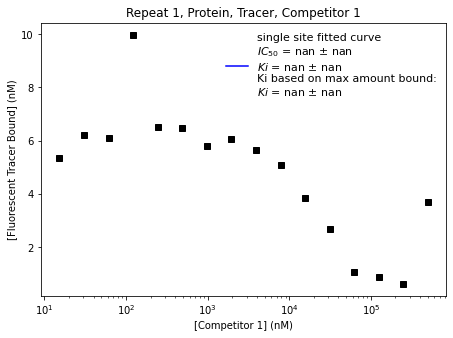

5000.0
nan


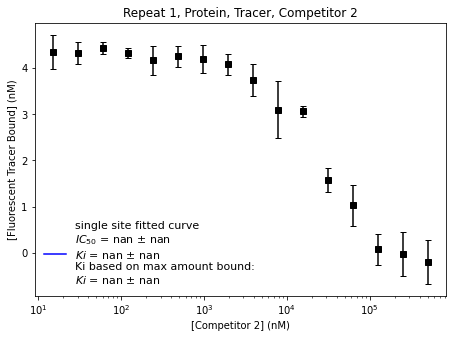

5000.0
nan


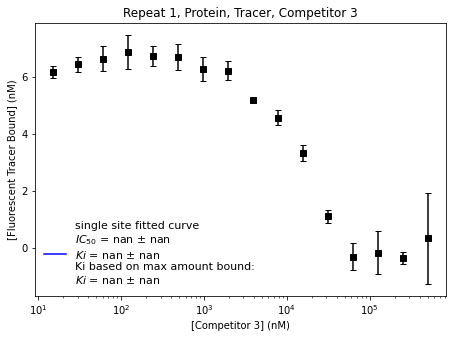

5000.0
nan


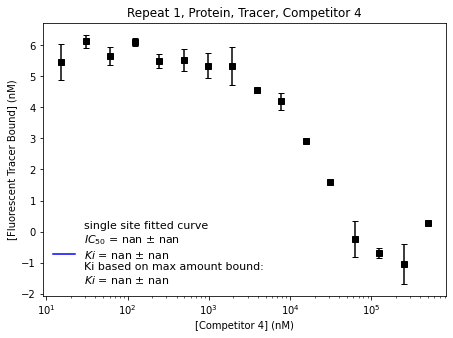

In [15]:
my_data.plot_ic50()

To overlay data for specified proteins and tracers on a single graph pass the additional argument `overlay=True`.

To export the graphs either pass the `export=True` to save them in the same location as this notebook or pass a string with path to preferred directory (e.g. `export="C:\\folder1\\folder2\\"` for Windows OS)